## RQ5

Does a long distance correlate with the duration of the trip on average? 
Make a plot that show the dependence between distance and duration of the trip. 
Then compute the Pearson Coefficient, is it significant? Comment the results you obtain.

## Import libraries


In [ ]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# timedelta is needed to express difference between 2 timestamps in minutes
from datetime import timedelta
# math library is needed for ceil function
import math
import matplotlib.pyplot as plt
import os, json, requests, pickle
from scipy.stats import skew
#from shapely.geometry import Point,Polygon,MultiPoint,MultiPolygon
from scipy.stats import ttest_ind, f_oneway, lognorm, levy, skew, chisquare
#import scipy.stats as st
from sklearn.preprocessing import normalize, scale
#from tabulate import tabulate #pretty print of tables. source: http://txt.arboreus.com/2013/03/13/pretty-print-tables-in-python.html
#from shapely.geometry import Point,Polygon,MultiPoint
from scipy.stats.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')

## Import data

In [20]:
yellow_2018_06=pd.read_csv('yellow_tripdata_2018-06.csv',encoding='latin1')

In [21]:
taxi_zones=pd.read_csv('taxi _zone_lookup.csv',encoding='latin1')

In [22]:
# Merge the data set with the reference data for taxi zones
yellow_2018_06_with_tz = yellow_2018_06.merge(taxi_zones,left_on='PULocationID', right_on='LocationID')

In [23]:
# columns tpep_pickup_datetime and tpep_dropoff_datetime are in string format
# to caclulate duration of the ride we need to convert them to date format which can be done using strptime function from datetime
yellow_2018_06_with_tz['tpep_dropoff_datetime'] = yellow_2018_06_with_tz['tpep_dropoff_datetime'].map(lambda tpep_dropoff_datetime: datetime.strptime(tpep_dropoff_datetime, "%Y-%m-%d %H:%M:%S"))

In [30]:
del yellow_2018_06

In [24]:
yellow_2018_06_with_tz['tpep_pickup_datetime'] = yellow_2018_06_with_tz['tpep_pickup_datetime'].map(lambda tpep_pickup_datetime: datetime.strptime(tpep_pickup_datetime, "%Y-%m-%d %H:%M:%S"))

In [25]:
# adding new column trip_duration into the data set
yellow_2018_06_with_tz['trip_duration']=(yellow_2018_06_with_tz['tpep_dropoff_datetime']-yellow_2018_06_with_tz['tpep_pickup_datetime'])/timedelta(minutes=1)

In [27]:
# to plot trip duration in more readable form values will be rounded upwards (ceiled)
yellow_2018_06_with_tz['trip_duration']=yellow_2018_06_with_tz['trip_duration'].map(lambda trip_duration: math.ceil(trip_duration))

## Data clean up

Take into account trips where:
    - Trip distance is positive and greater than 0
    - Trip duration is positive and greater than 0
    - Number of passangers is positive and greater than 0
    - Drop off time is after the pick up time
    - Pick up time is in 2018


In [48]:
yellow_2018_06_with_tz = yellow_2018_06_with_tz[yellow_2018_06_with_tz['trip_distance'] > 0]
yellow_2018_06_with_tz = yellow_2018_06_with_tz[yellow_2018_06_with_tz['trip_duration'] > 0]
yellow_2018_06_with_tz = yellow_2018_06_with_tz[yellow_2018_06_with_tz['passenger_count']>0]
yellow_2018_06_with_tz = yellow_2018_06_with_tz[yellow_2018_06_with_tz['tpep_pickup_datetime']<yellow_2018_06_with_tz['tpep_dropoff_datetime']]
yellow_2018_06_with_tz = yellow_2018_06_with_tz[yellow_2018_06_with_tz['tpep_pickup_datetime']>datetime(2017,12,31)]
#yellow_2018_06_with_tz = yellow_2018_06_with_tz[yellow_2018_06_with_tz['fare_amount']>0]

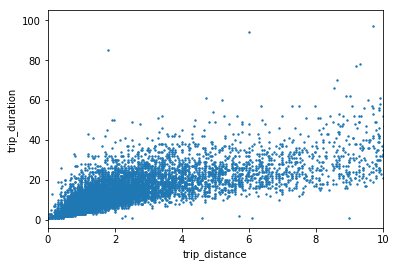

In [67]:
# Trips over 100 minutes are rare and some values are unrealisticly high. To eliminate those outliers which affect a lot
# correlation calculation, we decided to look only into trips with duration less than 100 hours
yellow_2018_06_with_tz_1 = yellow_2018_06_with_tz[yellow_2018_06_with_tz['trip_duration'] <= 100]

# For better visibility only sample of 10000 points is used 
yellow_2018_06_with_tz_2=yellow_2018_06_with_tz_1.sample(10000)
yellow_2018_06_with_tz_2.plot(x="trip_distance",y="trip_duration",kind="scatter",s=2, xlim=(0,10))

Scatter plot indicates that there could be a linear correlation between these two variables.

The Pearson correlation coefficient measures the linear relationship between two datasets. 
Strictly speaking, Pearson's correlation requires that each dataset be normally distributed. 
Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact linear relationship. 
Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.
The p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Pearson correlation at least as extreme as the one computed from these datasets.

In [60]:
pearsonr(yellow_2018_06_with_tz_1.trip_distance, yellow_2018_06_with_tz_1.trip_duration)

(0.8066075441940973, 0.0)

Pearson correlation coefficient is 0.8 and p=0.0. It means that test is statistically significant 
and there is a strong positive correlation between trip distance and trip duration.

v